In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
fname = "210309\\210309_Bi2Te3_p5_power_dep_f3p4_1.txt"
df = pd.read_csv(fname, sep = ',', header = 0)
df.head()

,Date_time,Time,V_input,TC,SENS_X3,SENS_X1,X3,Y3,X1_ref,Y1_ref
0,2021-03-09 17:19:25.363647,300.0122,0.1,13,15,24,1.072890e-06,1.415620e-07,0.004349,-0.000008
1,2021-03-09 17:24:25.440811,600.0893,0.5,13,15,24,2.808880e-06,1.244250e-06,0.021736,-0.000031
2,2021-03-09 17:29:25.514974,900.1635,0.7,13,15,24,1.534830e-06,2.771630e-06,0.030419,-0.000038
3,2021-03-09 17:34:25.593137,1200.2416,0.9,13,15,24,4.246850e-07,5.498560e-06,0.039086,-0.000053
4,2021-03-09 17:39:25.665301,1500.3138,1.1,13,15,24,-7.525120e-07,9.700710e-06,0.047753,-0.000053


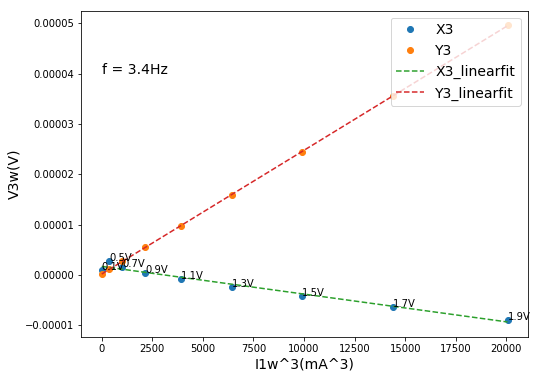

In [39]:
fz = 14
fig, ax = plt.subplots(1,1, figsize = (8,6))
Rref = 3.03
df['I1w'] = df['X1_ref']/Rref
ax.plot((df['I1w'])**3*1e9, df.X3, marker = 'o', linestyle = 'none', label = 'X3')
ax.plot((df['I1w'])**3*1e9, df.Y3, marker = 'o', linestyle = 'none', label = 'Y3')
p1 = np.polyfit(df['I1w']**3,df.X3,1)
p2 = np.polyfit(df['I1w']**3,df.Y3,1)
ax.plot(df['I1w']**3*1e9, np.polyval(p1, df['I1w']**3), linestyle = '--', label = 'X3_linearfit')
ax.plot(df['I1w']**3*1e9, np.polyval(p2, df['I1w']**3), linestyle = '--', label ='Y3_linearfit')
ax.set_xlabel('I1w^3(mA^3)', fontsize = fz)
ax.set_ylabel('V3w(V)', fontsize = fz)
ax.legend(loc = 'upper right', fontsize = fz)

for i, txt in enumerate(df['V_input']):
    ax.annotate(str(txt) + 'V', (df['I1w'][i]**3*1e9, df['X3'][i]), fontsize = fz - 4)

ax.annotate('f = 3.4Hz', (0, 0.00004), fontsize = fz)
fig.savefig(fname[:-4] + '_power_dep_plot.png', dpi = 100)

In [30]:
help(fig.savefig)

Help on method savefig in module matplotlib.figure:

savefig(fname, **kwargs) method of matplotlib.figure.Figure instance
    Save the current figure.
    
    Call signature::
    
      savefig(fname, dpi=None, facecolor='w', edgecolor='w',
              orientation='portrait', papertype=None, format=None,
              transparent=False, bbox_inches=None, pad_inches=0.1,
              frameon=None)
    
    The output formats available depend on the backend being used.
    
    Parameters
    ----------
    
    fname : str or file-like object
        A string containing a path to a filename, or a Python
        file-like object, or possibly some backend-dependent object
        such as :class:`~matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is *None* and *fname* is a string, the output
        format is deduced from the extension of the filename. If
        the filename has no extension, the value of the rc parameter
        ``savefig.format`` is used.
    
   